In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
# linear regression model
class Model(object):
  def __init__(self):
    self.W = tf.Variable(5.0)
    self.b = tf.Variable(0.0)

  def __call__(self, x):
    return self.W * x + self.b

In [8]:
# MSE : Mean Squared Error
def loss_function(y, predicted):
  return tf.reduce_mean(tf.square(predicted - y))

In [9]:
model = Model()

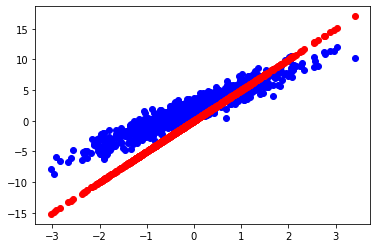

In [10]:
true_w = 3.0
true_b = 2.0
examples = 1000

inputs = tf.random.normal(shape=[examples])
noise = tf.random.normal(shape=[examples])
outputs = inputs* true_w + true_b + noise

plt.scatter(inputs, outputs, c = 'b') # y
plt.scatter(inputs, model(inputs), c='r') # H(x)
plt.show()

In [11]:
loss = loss_function(outputs, model(inputs))
print(loss)

tf.Tensor(9.311225, shape=(), dtype=float32)


In [16]:
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss_function(outputs, model(inputs))
  dW, db = t.gradient(current_loss, [model.W, model.b])
  model.W.assign_sub(learning_rate*dW)
  model.b.assign_sub(learning_rate*db)

Ws, bs = [], [] # plot
epochs = 15
for epoch in range(epochs):
  Ws.append(model.W.numpy())
  bs.append(model.b.numpy())
  current_loss = loss_function(model(inputs), outputs)

  train(model, inputs, outputs, learning_rate=0.1)
  print('epoch: %2d, W=%1.2f, b=%1.2f, loss=%2.5f'%(epoch, Ws[-1], bs[-1], current_loss))

epoch:  0, W=5.00, b=0.00, loss=9.31122
epoch:  1, W=4.57, b=0.42, loss=6.12203
epoch:  2, W=4.24, b=0.75, loss=4.14895
epoch:  3, W=3.98, b=1.01, loss=2.92796
epoch:  4, W=3.78, b=1.22, loss=2.17221
epoch:  5, W=3.62, b=1.39, loss=1.70430
epoch:  6, W=3.50, b=1.52, loss=1.41454
epoch:  7, W=3.40, b=1.62, loss=1.23505
epoch:  8, W=3.33, b=1.71, loss=1.12383
epoch:  9, W=3.27, b=1.77, loss=1.05490
epoch: 10, W=3.22, b=1.82, loss=1.01216
epoch: 11, W=3.19, b=1.86, loss=0.98566
epoch: 12, W=3.16, b=1.90, loss=0.96922
epoch: 13, W=3.14, b=1.92, loss=0.95901
epoch: 14, W=3.12, b=1.94, loss=0.95268


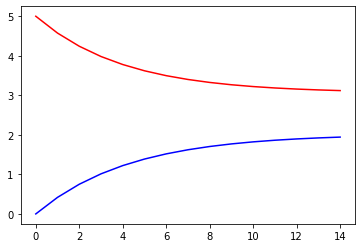

In [17]:
plt.plot(range(epochs), Ws, 'r', range(epochs), bs, 'b')
plt.show()